In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['digit-recognizer']


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
y = train.label
X = train.drop('label', axis=1)

In [5]:
X_train = X.values/255
X_train = X_train.reshape(-1,28,28,1)
y_train = np_utils.to_categorical(y)

In [6]:
X_test = test.values / 255
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
#convert the grayscale image (single channel) to RGB (3 channel) so it becomes 28x28x3
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train), name=None)
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test), name=None)

#VGG16 minimum image size of 48x48 as input
#resize image to twice it size so we got an integer scale factor of 2, the image becomes 56x56x3
X_train = tf.keras.backend.resize_images(X_train, height_factor=2, width_factor=2, data_format='channels_last')
X_test = tf.keras.backend.resize_images(X_test, height_factor=2, width_factor=2,data_format='channels_last')

2022-05-18 21:36:59.886424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:36:59.977062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:36:59.978041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:36:59.980448: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
#convert tensor to numpy
with tf.compat.v1.Session() as sess:
    X_train = X_train.numpy()
    X_test = X_test.numpy()

2022-05-18 21:37:02.877403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:37:02.878247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:37:02.879018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:37:02.879808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 21:37:02.880546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [9]:
def myModel(weights_path = None):
    model = Sequential()
    
    model.add(Conv2D(input_shape=(56,56,3),filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    
    model.add(Flatten())
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    
    return model

In [10]:
VGG = myModel()
VGG.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
VGG.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       2

In [11]:
history = VGG.fit(X_train,y_train,batch_size=64, epochs=20, validation_split=0.2,verbose=1)

2022-05-18 21:37:09.770127: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1264435200 exceeds 10% of free system memory.
2022-05-18 21:37:11.097922: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1264435200 exceeds 10% of free system memory.
2022-05-18 21:37:12.076438: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-05-18 21:37:13.564592: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


525/525 [==============================] - 33s 49ms/step - loss: 2.3009 - accuracy: 0.1179 - val_loss: 2.2992 - val_accuracy: 0.1131
Epoch 2/20
525/525 [==============================] - 24s 46ms/step - loss: 2.2969 - accuracy: 0.1138 - val_loss: 2.2913 - val_accuracy: 0.1235
Epoch 3/20
525/525 [==============================] - 24s 46ms/step - loss: 1.9423 - accuracy: 0.3639 - val_loss: 0.5826 - val_accuracy: 0.8207
Epoch 4/20
525/525 [==============================] - 24s 46ms/step - loss: 0.2750 - accuracy: 0.9110 - val_loss: 0.1286 - val_accuracy: 0.9580
Epoch 5/20
525/525 [==============================] - 25s 47ms/step - loss: 0.1202 - accuracy: 0.9612 - val_loss: 0.0961 - val_accuracy: 0.9683
Epoch 6/20
525/525 [==============================] - 24s 46ms/step - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0720 - val_accuracy: 0.9760
Epoch 7/20
525/525 [==============================] - 24s 46ms/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.0578 - val_accuracy: 0.9818
Epo

In [12]:
VGG.save_weights('vgg16_weights.h5')
VGG.save('vgg16-digitRecognizer_keras.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


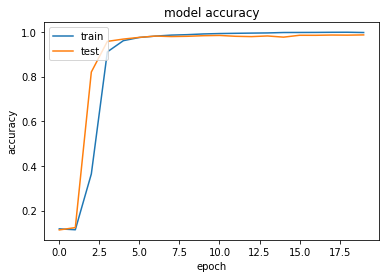

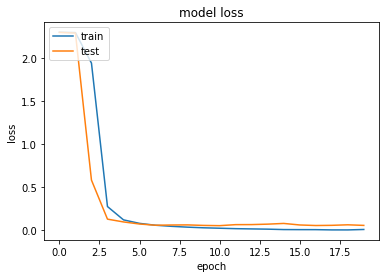

In [13]:
# show the accuracy and loss 
print(history.history.keys())
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from keras.models import load_model
VGG = load_model("vgg16-digitRecognizer_keras.h5")

In [15]:
import random
def plot_figures(x,y,nrows = 3, ncols=4):
    indexs = random.sample(range(0, len(y)), nrows*ncols)

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=(10,10))
    for ind,i in enumerate(indexs):
        axeslist.ravel()[ind].imshow(x[i], cmap=plt.gray())
        axeslist.ravel()[ind].set_title(y[i])
        axeslist.ravel()[ind].set_axis_off()

In [16]:
ret = VGG.predict(X_test)

2022-05-18 21:45:37.383319: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1053696000 exceeds 10% of free system memory.


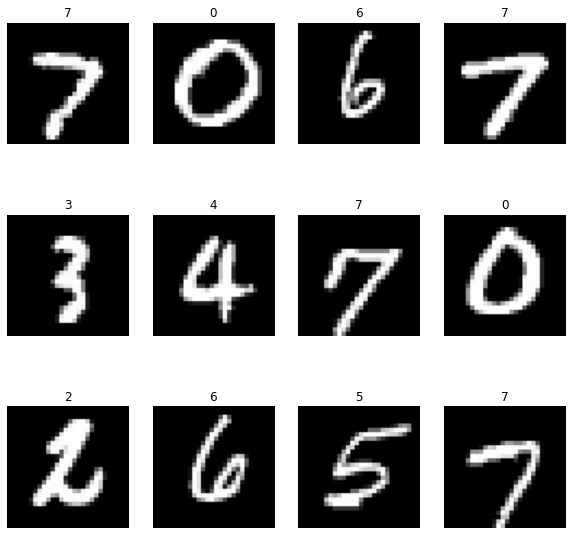

In [17]:
results = np.argmax(ret,axis = 1)
plot_figures(X_test,results,nrows = 3, ncols=4)